In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
categorias_species = df['species'].unique()
df['species'] = df['species'].astype('category').cat.codes  # Convert species to categorical codes
df.head()
# Crie uma variável com os valores categóricos únicos da coluna 'species' antes da conversão para int
print("Valores categóricos originais do target (species):", categorias_species)
r = len(df)

print("Value counts:", r)
for r in df['species'].unique():
    print(f"Species {categorias_species[r]}: {df['species'].value_counts()[r]}")

print(df.isnull().sum())  # Check for missing values

Valores categóricos originais do target (species): ['setosa' 'versicolor' 'virginica']
Value counts: 150
Species setosa: 50
Species versicolor: 50
Species virginica: 50
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


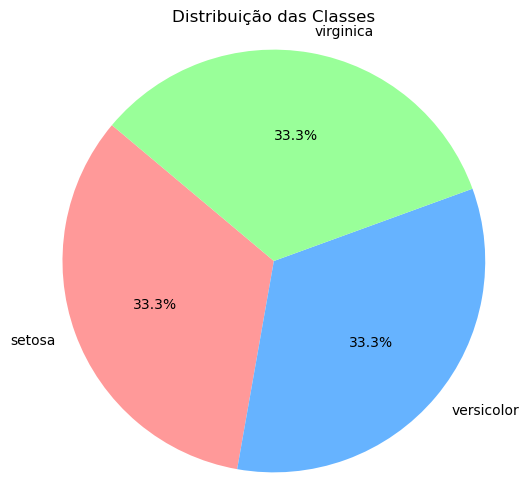

In [3]:
sizes =  df['species'].value_counts().values
labels = categorias_species
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(6,6))
plt.title('Distribuição das Classes')
plt.pie(sizes, labels=labels, colors=colors, autopct ='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [4]:
from sklearn.model_selection import train_test_split # Split the dataset into training and testing sets

df_train, df_temp = train_test_split(df, test_size = 0.3, random_state = 42)
df_test, df_val = train_test_split(df_temp, test_size = 0.5, random_state = 42)

print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print("Test set size:", len(df_test))



Training set size: 105
Validation set size: 23
Test set size: 22


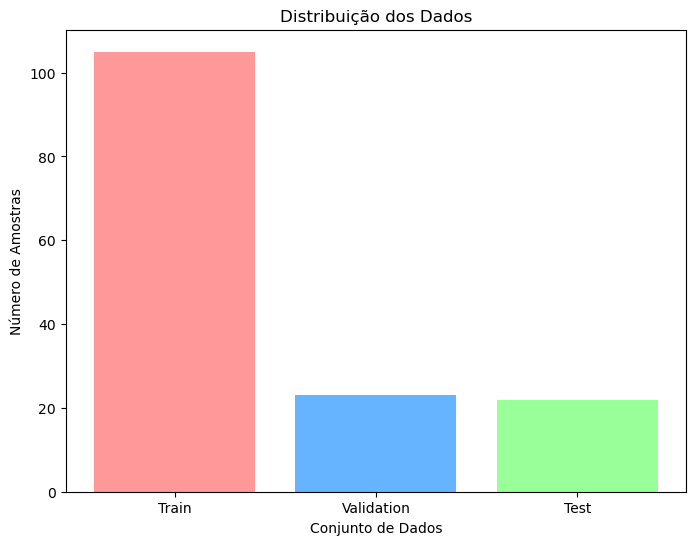

In [5]:
sizes = [len(df_train), len(df_val), len(df_test)]
labels = ['Train', 'Validation', 'Test']
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 6))
plt.title('Distribuição dos Dados')
plt.bar(labels, sizes, color=colors)
plt.ylabel('Número de Amostras')    
plt.xlabel('Conjunto de Dados')
plt.show()




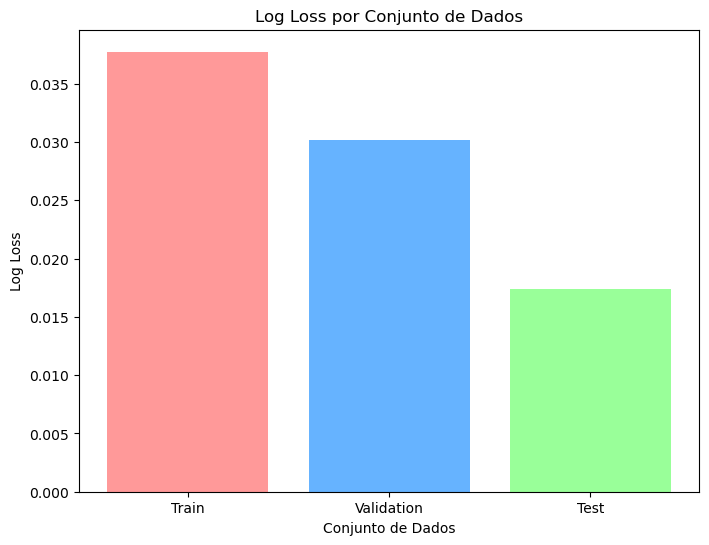

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Separe features e target
X_train, y_train = df_train.drop('species', axis=1), df_train['species']
X_val, y_val = df_val.drop('species', axis=1), df_val['species']
X_test, y_test = df_test.drop('species', axis=1), df_test['species']

# Crie e treine o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Agora você pode usar model.predict, model.score, etc.

# Calcule os losses
loss_train = log_loss(y_train, model.predict_proba(X_train)) # Calcule o log loss para o conjunto de treino
loss_val = log_loss(y_val, model.predict_proba(X_val)) # Calcule o log loss para o conjunto de validação
loss_test = log_loss(y_test, model.predict_proba(X_test)) # Calcule o log loss para o conjunto de teste


plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Validation', 'Test'], [loss_train, loss_val, loss_test], color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Log Loss por Conjunto de Dados')
plt.ylabel('Log Loss')  
plt.xlabel('Conjunto de Dados')
plt.show()

Text(0.5, 1.0, 'Acurácia por conjunto (%)')

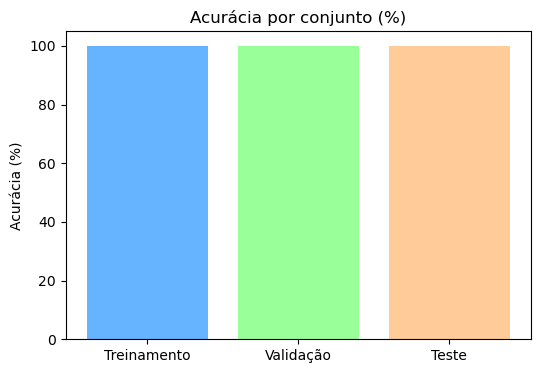

In [7]:
acc_train = accuracy_score(y_train, model.predict(X_train))  # Calcule a acurácia para o conjunto de treino
acc_val = accuracy_score(y_val, model.predict(X_val))
acc_test = accuracy_score(y_test, model.predict(X_test))

# Plote as acurácias em porcentagem
accuracies = [acc_train * 100, acc_test * 100, acc_val * 100]
labels = ['Treinamento', 'Validação', 'Teste']

plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por conjunto (%)')

Text(0.5, 1.0, 'Correlação das Features com o Target')

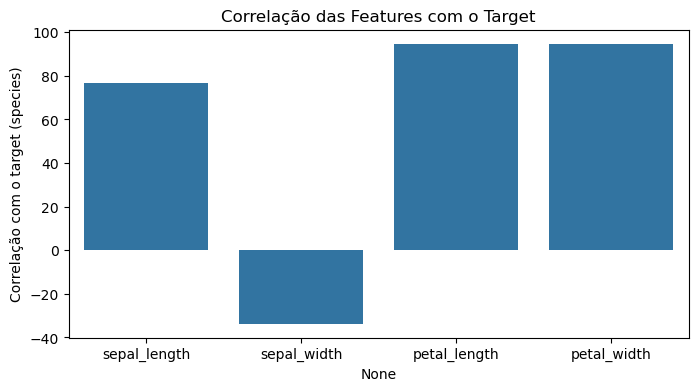

In [8]:
import seaborn as sns

# Adicione a coluna target de volta ao DataFrame de treino para análise
df_corr = df_train.copy()
df_corr['species'] = y_train

# Calcula a correlação
corr = df_corr.corr()

# Plota a correlação das features com o target
plt.figure(figsize=(8, 4))
sns.barplot(x=corr['species'].drop('species').index, y=corr['species'].drop('species').values *100)# Plota as correlações das features com o target
plt.ylabel('Correlação com o target (species)')
plt.title('Correlação das Features com o Target')

In [9]:
# Prever o target para um novo exemp'lo usando o modelo treinado
# Supondo que as colunas originais sejam:
colunas = X_train.columns
novo_exemplo_df = pd.DataFrame([[5.9, 3.0, 5.1, 1.8]], columns=colunas)
predito = model.predict(novo_exemplo_df)[0]
print(f"Classe prevista para [5.9, 3.0, 5.1, 1.8]: {categorias_species[predito]}")

Classe prevista para [5.9, 3.0, 5.1, 1.8]: virginica


<Figure size 500x400 with 0 Axes>

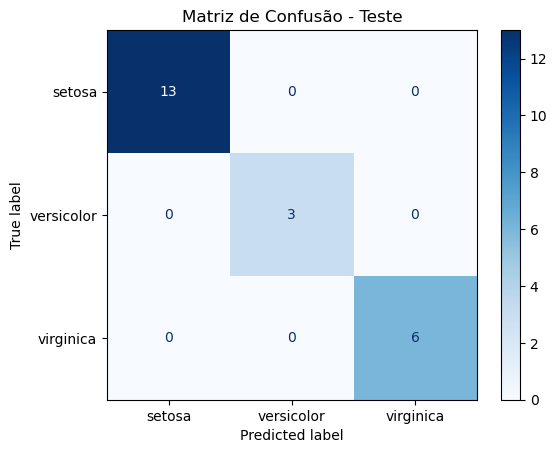

In [10]:
# Matriz de confusão para o conjunto de teste
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categorias_species)

plt.figure(figsize=(5,4))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Teste')
plt.show()

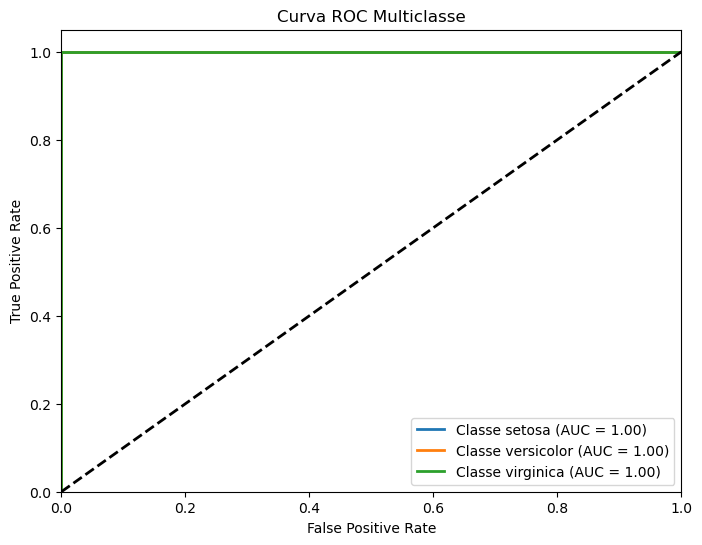

In [11]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test)) # Binarize the test labels
y_score = model.predict_proba(X_test) # Binarize the predicted probabilities
n_classes = y_test_binarized.shape[1] # Binarize the output for multiclass ROC

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i]) # Calculate ROC curve
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Classe {categorias_species[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")